**Problem : We have a company's dataset from a survey conducted for the employees. We have to do the analysis and figure out why the employees are leaving the company.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('people.xls')

In [ ]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [ ]:
df.duplicated().sum()

np.int64(3008)

In [ ]:
df.drop_duplicates(inplace=True) #to remove redundancy

In [ ]:
#outliers - extreme values

In [ ]:
df.dtypes

,0
satisfactoryLevel,float64
lastEvaluation,float64
numberOfProjects,int64
avgMonthlyHours,int64
timeSpent.company,int64
workAccident,int64
left,int64
promotionInLast5years,int64
dept,object
salary,object


In [ ]:
df.select_dtypes(exclude = 'object') #select only particular datatypes

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.37,0.52,2,159,3,0,1,0
4,0.41,0.50,2,153,3,0,1,0
...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0
14995,0.99,0.83,4,274,2,0,0,0
14996,0.72,0.72,4,175,4,0,0,0
14997,0.24,0.91,5,177,5,0,0,0


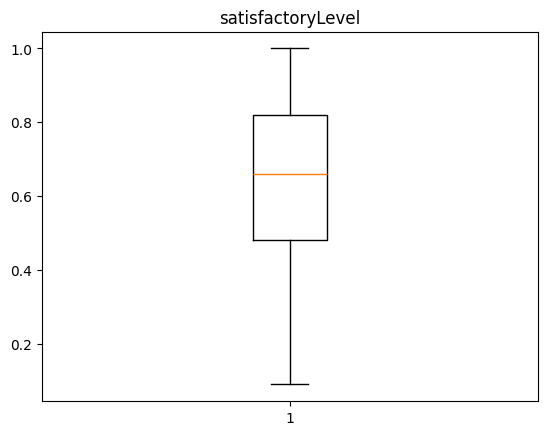

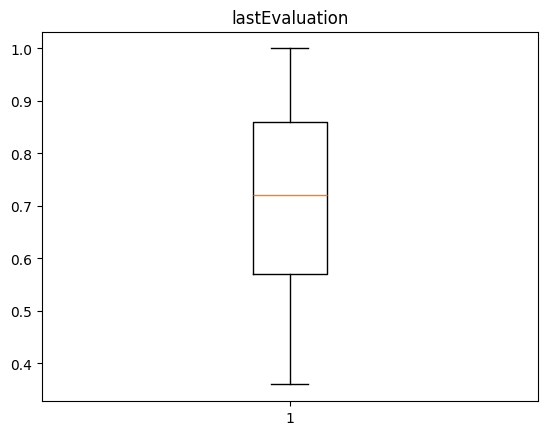

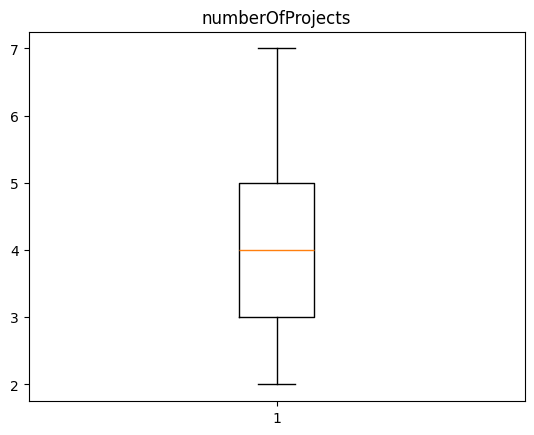

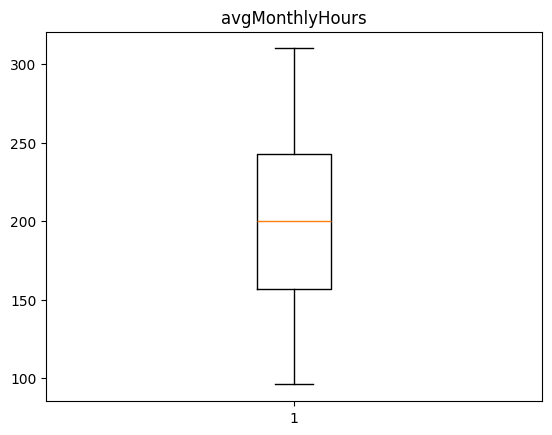

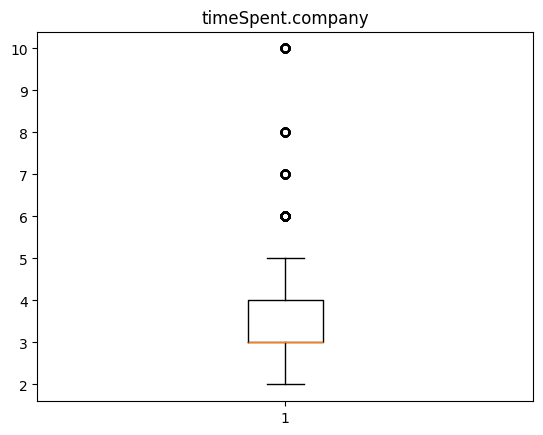

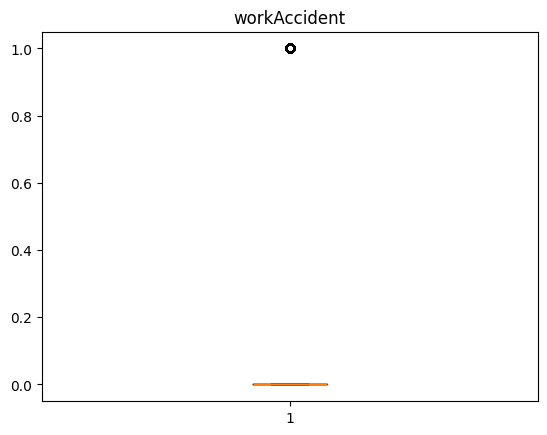

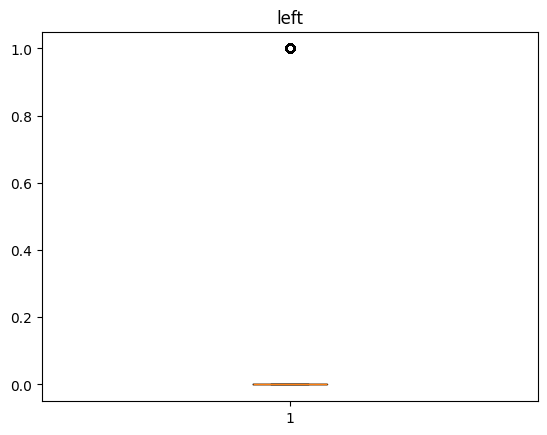

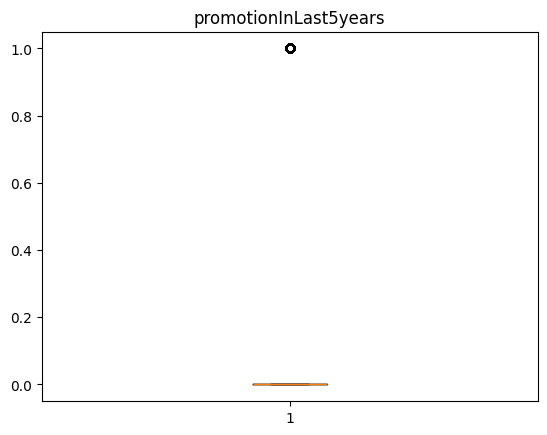

In [ ]:
for col in df.select_dtypes(exclude = 'object'):
  plt.boxplot(df[col])
  plt.title(col)
  plt.show()

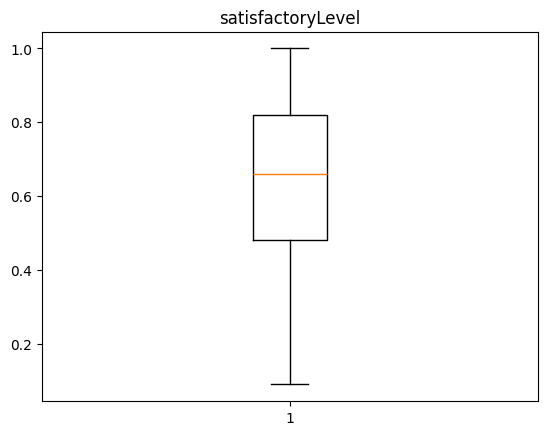

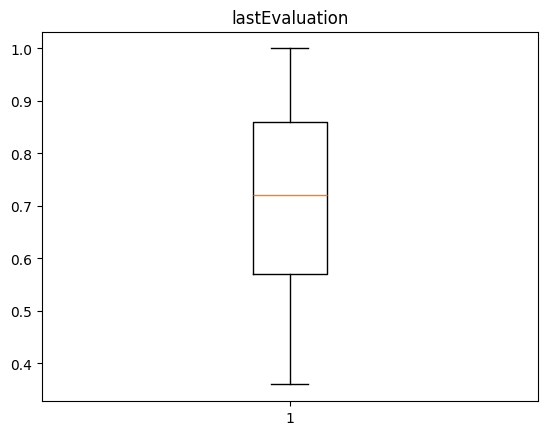

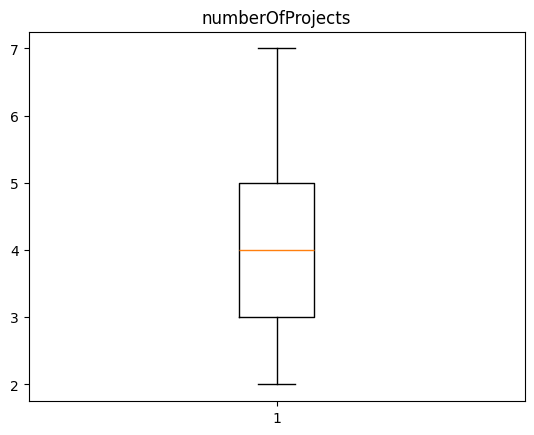

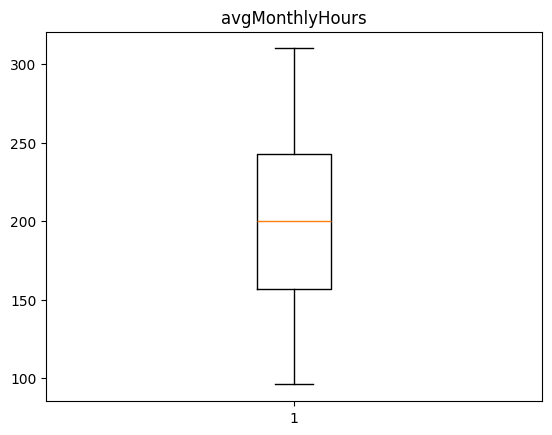

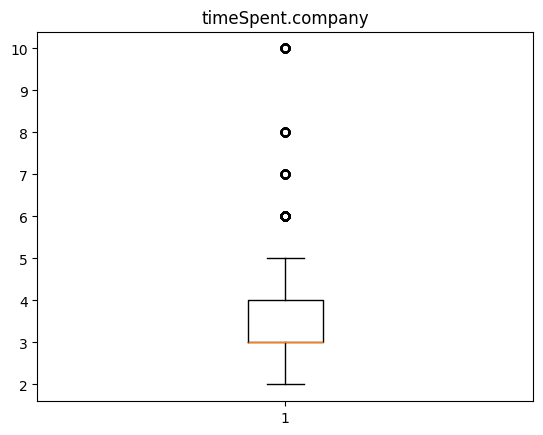

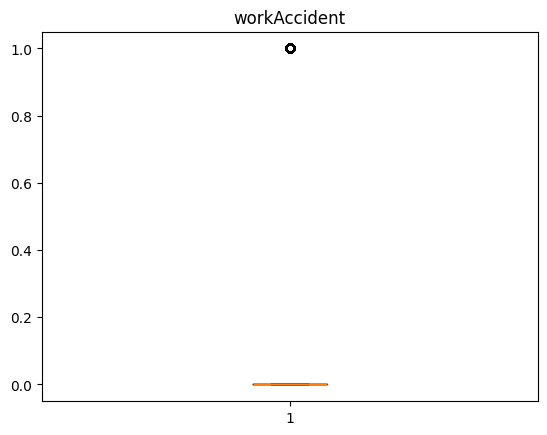

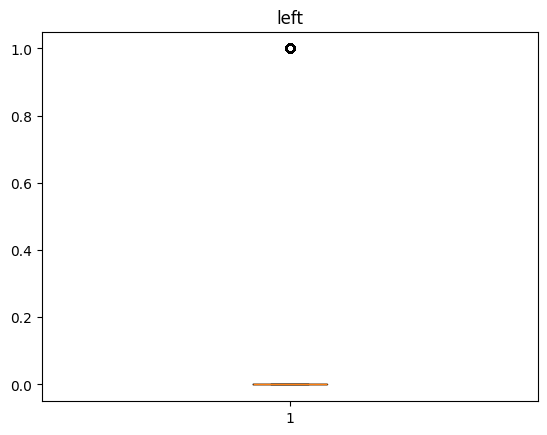

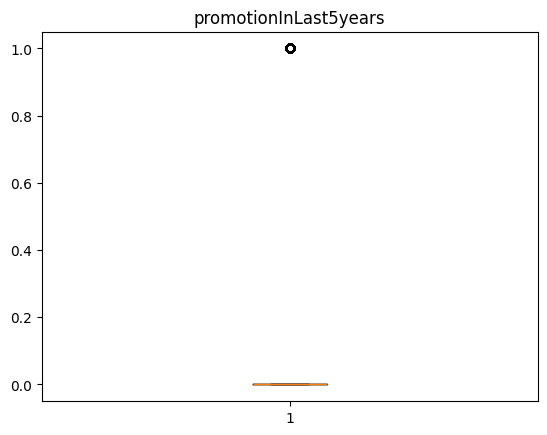

In [ ]:
for col in df.columns:
  if df[col].dtypes != 'object':
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

Q1. How the no of projects is affecting the employee turnover(left)

In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

<Axes: xlabel='numberOfProjects', ylabel='count'>

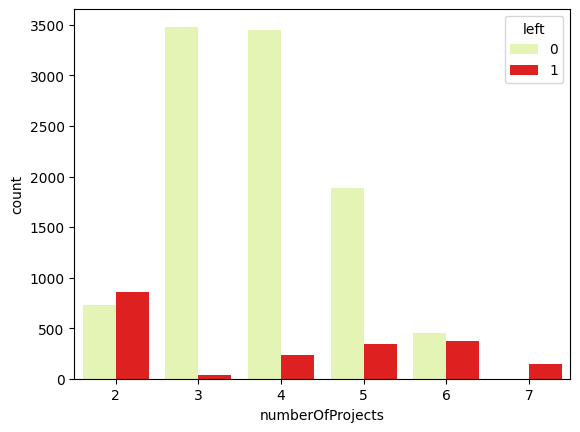

In [ ]:
sns.countplot(data = df,x='numberOfProjects',hue = 'left',palette=['#e7ffab','red'])

Q2. How the salaries are affecting the employee turnover?

<Axes: xlabel='salary', ylabel='count'>

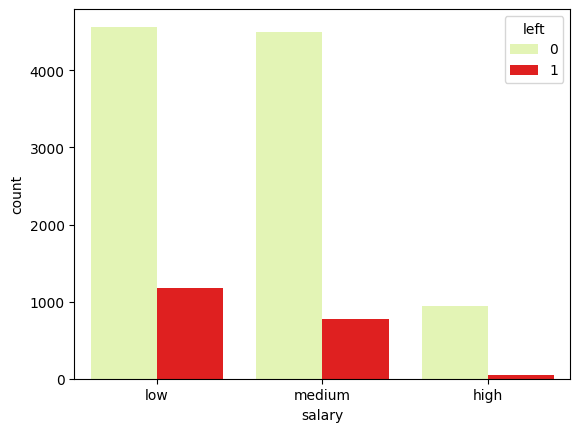

In [ ]:
sns.countplot(data = df,x='salary',hue = 'left',palette=['#e7ffab','red'])

Q3. How the avg monthly working hours is affecting employee turnover?

<Axes: xlabel='avgMonthlyHours', ylabel='Count'>

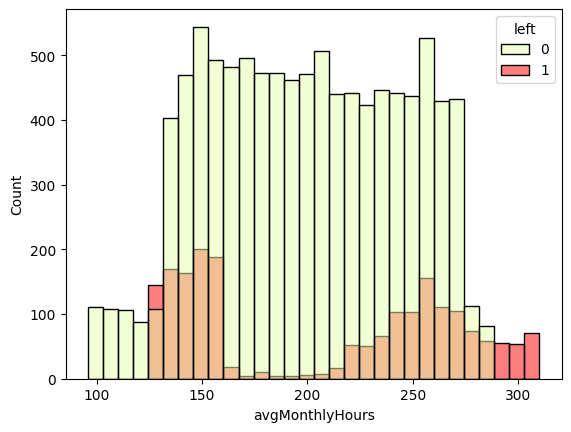

In [ ]:
sns.histplot(data = df,x='avgMonthlyHours',bins =30,hue = 'left',palette=['#e7ffab','red'])

Q4. Make subplots to figure out how:
a. promotion is affecting employee turnover
b. which dept's employees are leaving the most
c. how work accident is affecting employee turn over

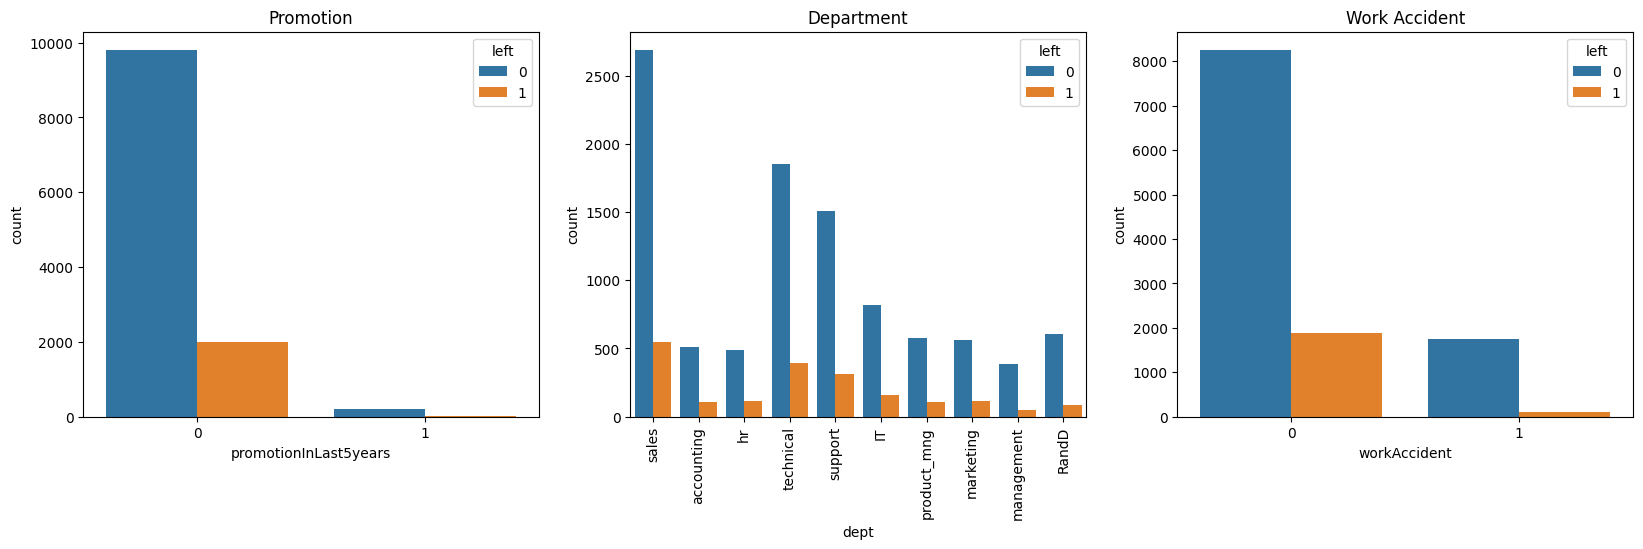

In [ ]:
plt.subplots(1,3,figsize=(20,5))

plt.subplot(1,3,1)
sns.countplot(data = df,x='promotionInLast5years',hue = 'left')
plt.title('Promotion')

plt.subplot(1,3,2)
sns.countplot(data = df,x='dept',hue = 'left')
plt.xticks(rotation = 90)
plt.title('Department')

plt.subplot(1,3,3)
sns.countplot(data = df,x= 'workAccident',hue = 'left')
plt.title('Work Accident')

plt.show()